# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [ ]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

but Gdown can't. Please check connections and permissions.


## Importing Libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.utils import resample
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical


## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [ ]:
# Load the dataset
df = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')

In [ ]:

# Inspect the dataset
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5.0,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3.0,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12.0,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11.0,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12.0,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [ ]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4529 entries, 0 to 4528
Columns: 18252 entries, Busbreakdown_ID to School_Age_or_PreK_School-Age
dtypes: bool(18248), float64(3), int64(1)
memory usage: 79.0 MB


In [ ]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus,Incident_Number
count,4.529000e+03,4528.000000,8.000000e+00
mean,1.218384e+06,4.495141,2.752923e+06
std,6.725384e+03,45.111128,2.741290e+04
min,1.212691e+06,0.000000,2.710619e+06
25%,1.214701e+06,0.000000,2.734306e+06
50%,1.216383e+06,1.000000,2.758249e+06
75%,1.224485e+06,5.000000,2.776866e+06
max,1.298257e+06,1492.000000,2.778855e+06


In [ ]:

# Check for missing values
df.isnull().sum()


,0
School_Year,0
Busbreakdown_ID,0
Run_Type,1
Bus_No,1
Route_Number,6
Reason,6
Schools_Serviced,1
Occurred_On,1
Created_On,1
Boro,204


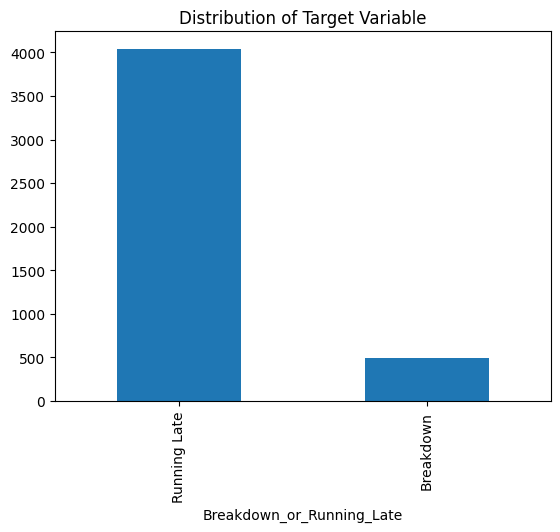

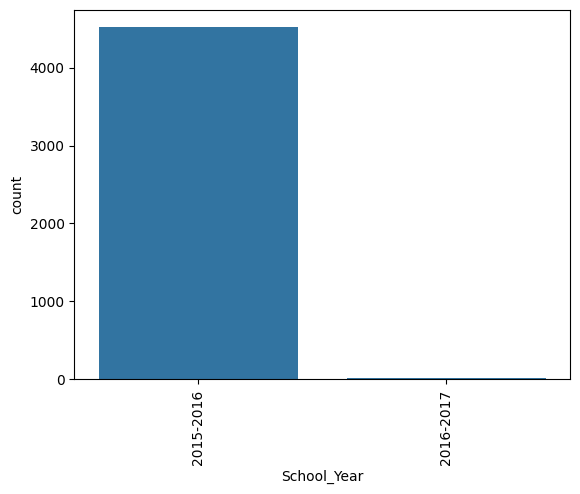

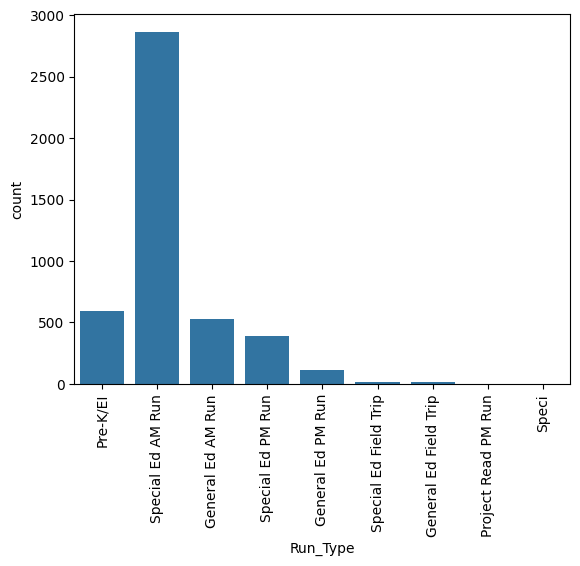

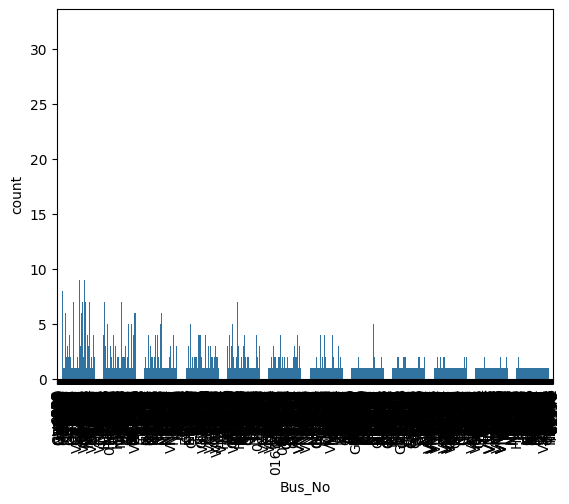

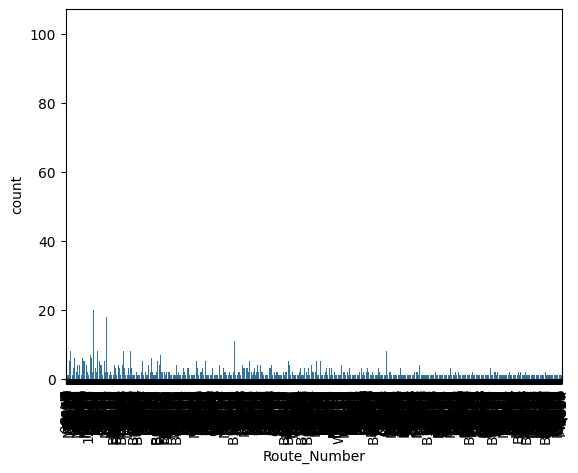

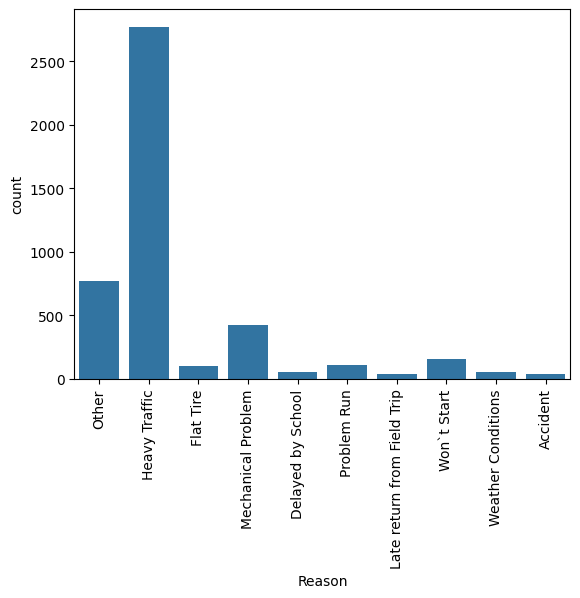

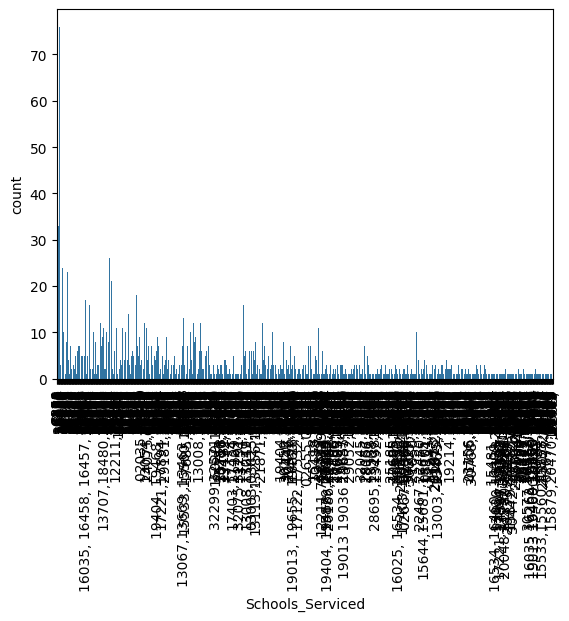

KeyboardInterrupt: 

In [ ]:

# Distribution of features
df['Breakdown_or_Running_Late'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.show()

# Categorical feature analysis
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=90)
    plt.show()


In [ ]:
# # Correlation matrix
# plt.figure(figsize=(12, 8))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()
# &&

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [ ]:

# Separate numeric and categorical columns
numeric_cols = ['Busbreakdown_ID', 'Number_Of_Students_On_The_Bus', 'Incident_Number']
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

# KNN for Numeric
imputer = KNNImputer(n_neighbors=5)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Mode for Categorical
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

df.isnull().sum()

School_Year                        0
Busbreakdown_ID                    0
Run_Type                           0
Bus_No                             0
Route_Number                       0
Reason                             0
Schools_Serviced                   0
Occurred_On                        0
Created_On                         0
Boro                               0
Bus_Company_Name                   0
How_Long_Delayed                   0
Number_Of_Students_On_The_Bus      0
Has_Contractor_Notified_Schools    0
Has_Contractor_Notified_Parents    0
Have_You_Alerted_OPT               0
Informed_On                        0
Incident_Number                    0
Last_Updated_On                    0
Breakdown_or_Running_Late          0
School_Age_or_PreK                 0
dtype: int64


In [ ]:
# Handle Missing Values - Drop rows with missing target labels
df = df.dropna(subset=['Breakdown_or_Running_Late'])

# Handle Categorical Variables - Encoding
label_encoder = LabelEncoder()
df['Breakdown_or_Running_Late'] = label_encoder.fit_transform(df['Breakdown_or_Running_Late'])

# One-Hot Encode categorical features
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4529 entries, 0 to 4528
Columns: 18252 entries, Busbreakdown_ID to School_Age_or_PreK_School-Age
dtypes: bool(18248), float64(3), int64(1)
memory usage: 79.0 MB


In [ ]:
df.head()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus,Incident_Number,Breakdown_or_Running_Late,School_Year_2016-2017,Run_Type_General Ed Field Trip,Run_Type_General Ed PM Run,Run_Type_Pre-K/EI,Run_Type_Project Read PM Run,Run_Type_Speci,...,Last_Updated_On_11/30/2015 02:36:23 PM,Last_Updated_On_11/30/2015 03:41:18 PM,Last_Updated_On_12/02/2015 07:40:40 AM,Last_Updated_On_12/02/2015 08:05:41 AM,Last_Updated_On_12/07/2015 07:38:49 AM,Last_Updated_On_12/10/2015 03:01:28 PM,Last_Updated_On_12/15/2015 07:54:42 AM,Last_Updated_On_12/21/2015 07:27:52 AM,Last_Updated_On_12/21/2015 08:10:28 AM,School_Age_or_PreK_School-Age
0,1224901.0,5.0,2769943.4,1,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1225098.0,3.0,2769943.4,1,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1215800.0,12.0,2738032.4,1,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1215511.0,11.0,2738032.4,1,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1215828.0,12.0,2738032.4,1,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['Breakdown_or_Running_Late']))

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [ ]:
X = pd.DataFrame(scaled_features, columns=df.columns[:-1])
y = df['Breakdown_or_Running_Late']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [ ]:


input_dim = X_train.shape[1]

# One-hot encode the target variable
num_classes = len(np.unique(y_train))

# If not one-hot, convert y_train and y_test
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Modify your model with dropout layers and L2 regularization
model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,), kernel_regularizer=l2(0.001)),
    Dropout(0.5),  # Drop 50% of the neurons randomly
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(num_classes, activation='softmax')
])

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


## Training the Model
Train the ANN model using the training data.

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=32, verbose=1, callbacks=[early_stopping])


Epoch 1/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.6673 - loss: 1.1391 - val_accuracy: 0.8918 - val_loss: 0.6076
Epoch 2/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.8933 - loss: 0.6175 - val_accuracy: 0.8918 - val_loss: 0.5551
Epoch 3/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9088 - loss: 0.4392 - val_accuracy: 0.8985 - val_loss: 0.5070
Epoch 4/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9426 - loss: 0.3411 - val_accuracy: 0.9051 - val_loss: 0.4676
Epoch 5/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.9784 - loss: 0.2634 - val_accuracy: 0.8709 - val_loss: 0.4534
Epoch 6/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.9905 - loss: 0.2210 - val_accuracy: 0.8455 - val_loss: 0.4536
Epoch 7/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.9944 - loss: 0.1865 - val_accuracy: 0.8223 - val_loss: 0.4626
Epoch 8/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.9966 - loss: 0.1662 - val_acc

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

29/29 - 0s - 7ms/step - accuracy: 0.9503 - loss: 0.2292
Test Accuracy: 0.9503


## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [ ]:

# Make Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        98
           1       0.98      0.97      0.97       808

   micro avg       0.95      0.95      0.95       906
   macro avg       0.86      0.89      0.88       906
weighted avg       0.95      0.95      0.95       906
 samples avg       0.95      0.95      0.95       906



## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

In [ ]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

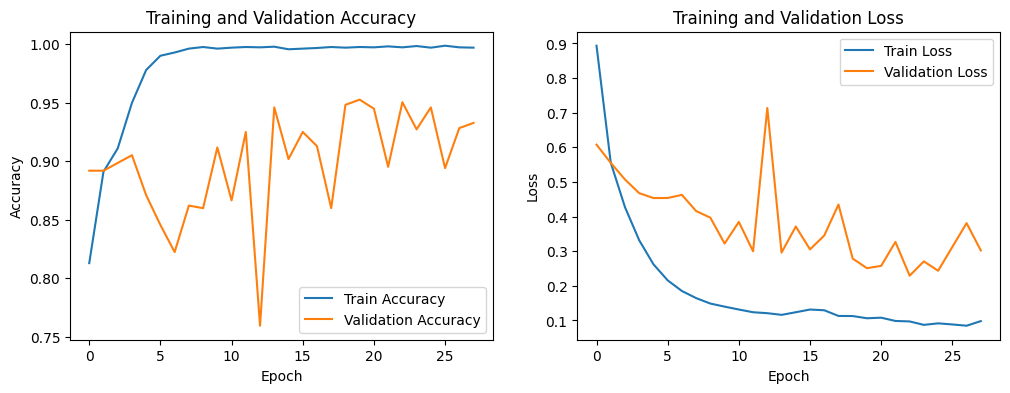

In [ ]:

# Model Performance Visualization
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Save the Model
Save the trained model for submission.

In [ ]:
model.save('bus_breakdown_ann_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?


### Answer Here:



1. **Data Preprocessing**: I used normalization to ensure all features were on a similar scale, which helps the model converge faster. Categorical variables were encoded using one-hot encoding to allow the model to properly interpret them. These steps ensured that the data was clean and in a format suitable for training.

2. **Model Architecture**: The model consists of several dense layers with ReLU activation, followed by a softmax output layer. This architecture was chosen to balance complexity and computational efficiency. The dense layers help extract important patterns, while dropout layers reduce overfitting.

3. **Training Process**: I selected a batch size of 32 for a good balance between memory efficiency and model stability. The Adam optimizer was used for its adaptability during training. Training for 30 epochs was enough to observe trends without excessive overfitting. I tested different epochs and found 30 to work well.

4. **Loss Function and Metrics**: I used categorical crossentropy as the loss function since it is suitable for multi-class classification problems. Accuracy was the primary evaluation metric as it directly reflects how well the model classifies the target labels.

5. **Regularization Techniques**: Dropout layers were added to prevent overfitting by randomly dropping neurons during training. L2 regularization was applied to penalize large weights, helping the model generalize better on unseen data.

6. **Model Evaluation**: I evaluated the model using accuracy and validation loss. Accuracy directly shows the model’s performance, while validation loss helps monitor overfitting. Early stopping was also applied to stop training once the validation loss stopped improving.

7. **Model Tuning (If Done)**: Hyperparameter tuning involved testing different learning rates and dropout rates. Adjustments like increasing dropout helped reduce overfitting, and tweaking the learning rate improved training stability.

8. **Overfitting and Underfitting**: The model initially showed signs of overfitting as validation accuracy decreased after some epochs. Adding dropout and early stopping mitigated this issue by forcing the model to generalize better.